## Image Quantization using Pillow

We apply quantization to an image to reduce the number of possible color combinations in the image.

```python
Image.quantize(colors: int = 256, method: int | None = None, kmeans: int = 0, palette: Image | None = None, dither: Dither = Dither.FLOYDSTEINBERG)
```

This converts the image to 'P' mode with the specified number of colors.

**Parameters:**

* **colors** – The desired number of colors (must be ≤ 256).

* **method** – The quantization method:

  * `Quantize.MEDIANCUT` (median cut)
  * `Quantize.MAXCOVERAGE` (maximum coverage)
  * `Quantize.FASTOCTREE` (fast octree)
  * `Quantize.LIBIMAGEQUANT` (uses libimagequant; check support using `PIL.features.check_feature()` with `feature="libimagequant"`)

  By default, `Quantize.MEDIANCUT` is used.

  > **Note**: For RGBA images, `Quantize.MEDIANCUT` and `Quantize.MAXCOVERAGE` are not supported. Instead, `Quantize.FASTOCTREE` is used by default.

* **kmeans** – An integer ≥ 0, used for optional k-means clustering.

* **palette** – Quantize using the palette from a given `PIL.Image.Image`.

* **dither** – Dithering method applied when converting from mode “RGB” to “P” or from “RGB”/“L” to “1”. Options:

  * `Dither.NONE`
  * `Dither.FLOYDSTEINBERG` (default)

📚 Reference: [quantize() method](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.quantize)

---

### Dithering

Dithering is used in computer graphics to simulate color depth on systems with limited palettes. In a dithered image, unavailable colors are approximated by diffusing available colored pixels, creating an illusion of more colors.

---

### ⚠️ Important Note on Not Using the Pillow Library Directly for Display

When converting a quantized image to an array and back to an image, the result may **not display correctly**. Here's why:

#### 1️⃣ Your `quantize_image`

```python
quantize_image = img.quantize(colors=6)
print(quantize_image.mode)  # Output: 'P'
```

* The image is now in **palette mode** (`'P'`).
* Each pixel is an **index** into a color palette.
* When you use `.show()`, Pillow uses the internal **palette** to render the actual colors.

#### 2️⃣ `np.array(quantize_image)` → `Image.fromarray(...)`

```python
quantize_array = np.array(quantize_image)
new_image = Image.fromarray(quantize_array)
print(new_image.mode)  # Output: 'L'
```

* `np.array()` returns just the **indices**, not the RGB color values.
* `Image.fromarray` sees a 2D array of integers and assumes mode `'L'` (grayscale).
* No palette is attached, so `.show()` displays grayscale values, **not** the original colors.


In [1]:
import numpy as np
from PIL import Image

filename = "sample_image.jpg"

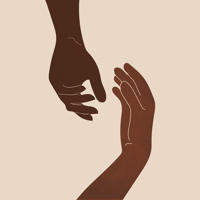

In [2]:
image = Image.open(filename)
image = image.resize((200, 200))
image

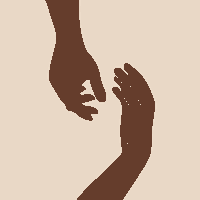

In [3]:
# Quanitize image to reduce the number of colors
quantized_image = image.quantize(colors=6)
quantized_image

In [4]:
quantize_array = np.array(quantized_image)
print("Shape  of quantize array: ", quantize_array.shape)
print("Unique element in R: ", np.unique(quantize_array))

Shape  of quantize array:  (200, 200)
Unique element in R:  [0 1 2 3 4 5]


In [5]:
# It should display same image but, well mode is different and display fully black
re_quant_image = Image.fromarray(quantize_array)

In [6]:
# Reason for this: is mode of two image are different
print("Mode of qunatized image: ", quantized_image.mode)
print("Mode of image after converting to array and back to image: ", re_quant_image.mode)

Mode of qunatized image:  P
Mode of image after converting to array and back to image:  L
